## Expected value of random variable

Expected value of random variable is generalization of taking average of numbers. It is similar to taking weighted average, where each value of random variable is multiplied by it's probability. 

$$\mathbb{E}[X] = \sum_{x \in \mathcal{X}} x \cdot p_X(x) $$

Also in terms of conditional probability,
$$\mathbb{E}[X \mid Y=y] = \sum_{x \in \mathcal{X}} x \cdot p_{X\mid Y}(x\mid y)$$

In general, let $f$ any function from $\mathbb{R}$ to $\mathbb{R}$, then 

$$ \mathbb{E}[f(X)] = \sum_{x \in \mathcal{X}} f(x) \cdot p_X(x) $$

Thus expectection gives a single number associated with a probability table.

### Exercise: Expected Value

Suppose that a student's score on a test will be $100$ if she studies the week before, and $75$ if she does not. Suppose also that the student's probability of studying the week before is $0.8$. What is her expected score? (Please provide an exact answer.)

In [1]:
X = {'S': 100, 'N':75}; p_X = {'S': 0.80, 'N': 0.20}
E_X = sum([X[i] * p_X[i] for i in X]); E_X

95.0

Let's look at why the expected value of a random variable is in some sense a “good" average value. Let $X$ be the result of a single fair six-sided die with faces $1$ up through $6$.

Simulate 10,000 rolls of the die roll in Python and take the average of the faces that appeared. What do you get? (Just make a note of it. There's no answer box to enter this in.)

What is $\mathbb{E}[X]$? (Please provide an exact answer.)

In [2]:
E_X = sum([i * 1/6 for i in range(1,7)]); E_X

3.5

You should notice that the average you get in simulation should be very close to E[X], and in fact, if you increase the number of rolls, it will tend to get closer (it doesn't necessarily have to get closer when you do each additional roll but the trend is there as you just keep increasing the number of rolls).

In [3]:
import sys
import numpy as np
sys.path.append('../comp_prob_inference')
import comp_prob_inference
p_X = {i: 1/6 for i in range(1, 7)}
num_samples = 10000
print(np.mean([comp_prob_inference.sample_from_finite_probability_space(p_X) for n in range(num_samples)]))

3.497


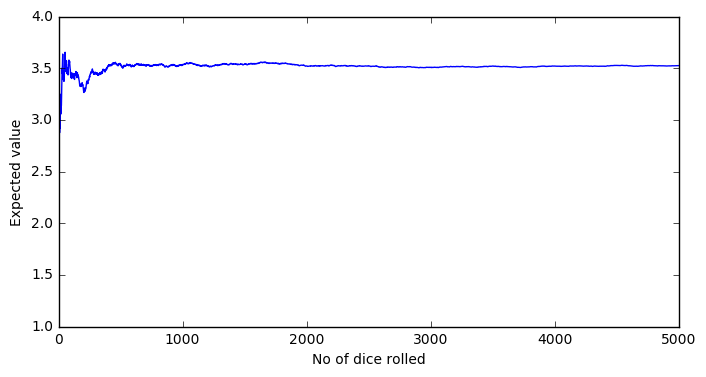

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

n = 5000
x = list(range(1, n+1))
y = []
for i in x:
    if i == 1:
        y.append(comp_prob_inference.sample_from_finite_probability_space(p_X))
    if i > 1:
        y.append((y[i-2] * (i-1) + comp_prob_inference.sample_from_finite_probability_space(p_X)) / i)
       
plt.xlabel('No of dice rolled')
plt.ylabel('Expected value')
plt.plot(x,y)
plt.show()

We can observe that as the no of dice roll increases the become closer to $3.5$.

## Variance 

This exercise explores the important concept of variance, which measures how much a random variable deviates from its expectation. This can be thought of as a measure of uncertainty. Higher variance means more uncertainty.

The variance of a real-valued random variable $X$ is defined as

$$\text {var}(X) \triangleq \mathbb {E}[ (X - \mathbb {E}[X])^2 ].$$
 
Note that as we saw previously, $\mathbb{E}[X]$ is just a single number. To keep the variance of $X$, what you could do is first compute the expectation of $X$.

For example, if $X$ takes on each of the values $3$, $5$, and $10$ with equal probability $1/3$, then first we compute $\mathbb{E}[X]$ to get $6$, and then we compute $\mathbb{E}[(X−6)^2]$, where we remember to use the result that for a function $f$, if $f(X)$ is a real-valued random variable, then $\mathbb{E}[f(X)]=\sum_x xf(x)pX(x)$. Here, $f$ is given by $f(x)=(x−6)^2$. So

$$\text {var}(X) = (3 - 6)^2 \cdot \frac13 + (5 - 6)^2 \cdot \frac13 + (10 - 6)^2 \cdot \frac13 = \frac{26}{3}.$$

In [5]:
def E(p_X):
    return sum([key * value for key, value in p_X.items()])  
    

def VAR(p_X):
    avg  = E(p_X)
    p_Xt = {(key - avg)**2 : value for key, value in p_X.items()}
    return E(p_Xt)

### Exercise 

Let's return to the three lotteries from earlier. Here, random variables $L_1$, $L_2$, and $L_3$ represent the amount won (accounting for having to pay \$1):

|$L_1$      |            $p$           |        $L_2$ |            $p$           |   $L_3$ |       $p$      |
|----------:|:------------------------:|-------------:|:------------------------:|--------:|:--------------:|
|        -1 | $\frac{999999}{1000000}$ |           -1 | $\frac{999999}{1000000}$ |      -1 | $\frac{9}{10}$ |
|   -1+1000 |    $\frac{1}{1000000}$   |   -1+1000000 |    $\frac{1}{1000000}$   |   -1+10 | $\frac{1}{10}$ |


Compute the variance for each of these three random variables. (Please provide the exact answer for each of these.)

- var($L_1$)= {{V_1}} 
- var($L_2$)= {{V_2}} 
- var($L_3$)= {{V_3}} 

In [6]:
p_L1 = {-1: 999999/1000000, 999   : 1/1000000}
p_L2 = {-1: 999999/1000000, 999999: 1/1000000}
p_L3 = {-1:      9/10     , 9     : 1/10     }

V_1 = VAR(p_L1)
V_2 = VAR(p_L2)
V_3 = VAR(p_L3)

What units is variance in? Notice that we started with dollars, and then variance is looking at the expectation of a dollar amount squared. Thus, specifically for the lottery example $\text {var}(L_1)$, $\text {var}(L_2)$, and $\text {var}(L_3)$ are each in squared dollars.

## Standard Deviation

Some times, people prefer keeping the units the same as the original units (i.e., without squaring), which you can get by computing what's called the standard deviation of a real-valued random variable $X$:

$$\text {std}(X) \triangleq \sqrt {\text {var}(X)}.$$

In [7]:
def STD(p_X):
    from sympy import sqrt 
    return sqrt(VAR(p_X))

### Exercise 

Compute the following standard deviations, which are in units of dollars. (Please be precise with at least 3 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

- std($L_1$) =  {{print(S_1)}}
- std($L_2$) =  {{print(S_2)}}
- std($L_3$) =  {{print(S_3)}}

In [8]:
S_1 = STD(p_L1)
S_2 = STD(p_L2)
S_3 = STD(p_L3) 

!Note 
    When we first introduced the three lotteries and computed average winnings, we didn't account for the uncertainty in the average winnings. Here, it's clear that the third lottery has far smaller standard deviation and variance than the second lottery.<br>
    As a remark, often in financial applications (e.g., choosing a portfolio of stocks to invest in), accounting for uncertainty is extremely important. For example, you may want to maximize profit while ensuring that the amount of uncertainty is not too high as to not be reckless in investing.

In the case of the three lotteries, to decide between them, you could for example use a score that is of the form

$$\mathbb {E}[L_ i] - \lambda \cdot \text {std}(L_ i) \qquad \text {for }i = 1,2,3,$$
 
where $λ≥0$ is some parameter that you choose for how much you want to penalize uncertainty in the lottery outcome. Then you could choose the lottery with the highest score.

Finally, a quick sanity check (this is more for you to think about the definition of variance rather than to compute anything out):

**Question:** Can variance be negative? If yes, give a specific distribution as a Python dictionary for which the variance is negative. If no, enter the text "no" (all lowercase, one word, no spaces).

**Answer:** NO

## The Law of Total Expectation

Remember the law of total probability? For a set of events $\mathcal{B}_{1},\dots ,\mathcal{B}_{n}$ that partition the sample space $Ω$ (so the Bi's don't overlap and together they fully cover the full space of possible outcomes),

$$\mathbb {P}(\mathcal{A})=\sum _{i=1}^{n}\mathbb {P}(\mathcal{A}\cap \mathcal{B}_{i})=\sum _{i=1}^{n}\mathbb {P}(\mathcal{A}\mid \mathcal{B}_{i})\mathbb {P}(\mathcal{B}_{i}),$$
 
where the second equality uses the product rule.

A similar statement is true for the expected value of a random variable, called the law of total expectation: for a random variable $X$ (with alphabet $\mathcal{X}$) and a partition $\mathcal{B}_1,\dots ,\mathcal{B}_ n$ of the sample space,

$$\mathbb {E}[X]=\sum _{i=1}^{n}\mathbb {E}[X\mid \mathcal{B}_{i}]\mathbb {P}(\mathcal{B}_{i}),$$
 
where

$$\mathbb {E}[X\mid \mathcal{B}_{i}] = \sum _{x\in \mathcal{X}}xp_{X\mid \mathcal{B}_{i}}(x) = \sum _{x\in \mathcal{X}}x\frac{\mathbb {P}(X=x,\mathcal{B}_{i})}{\mathbb {P}(\mathcal{B}_{i})}.$$
 
We will be using this result in the section “Towards Infinity in Modeling Uncertainty".

Show that the law of total expectation is true.

**Solution:** There are different ways to prove the law of total expectation. We take a fairly direct approach here, first writing everything in terms of outcomes in the sample space.

The main technical hurdle is that the events $\mathcal{B}_1, \dots , \mathcal{B}_ n$ are specified directly in the sample space, whereas working with values that $X$ takes on requires mapping from the sample space to the alphabet of $X$.

We will derive the law of total expectation starting from the right-hand side of the equation above, i.e., $\sum _{i=1}^{n}\mathbb {E}[X\mid \mathcal{B}_{i}]\mathbb {P}(\mathcal{B}_{i})$.

We first write $\mathbb {E}[X\mid \mathcal{B}_{i}]$ in terms of a summation over outcomes in $\Omega$:

$$\begin{align}
\mathbb {E}[X\mid \mathcal{B}_{i}]	=& \sum _{x\in \mathcal{X}}x\frac{\mathbb {P}(X=x,\mathcal{B}_{i})}{\mathbb {P}(\mathcal{B}_{i})}\\ 	 
=& \sum _{x\in \mathcal{X}}x\frac{\mathbb {P}(\{ \omega \in \Omega \; :\; X(\omega )=x\} \cap \mathcal{B}_{i})}{\mathbb {P}(\mathcal{B}_{i})}\\ 	 
=& \sum _{x\in \mathcal{X}}x\frac{\mathbb {P}(\{ \omega \in \Omega \; :\; X(\omega )=x\text { and }\omega \in \mathcal{B}_{i}\} )}{\mathbb {P}(\mathcal{B}_{i})}\\ 	 
=& \sum _{x\in \mathcal{X}}x\frac{\mathbb {P}(\{ \omega \in \mathcal{B}_{i}\; :\; X(\omega )=x\} )}{\mathbb {P}(\mathcal{B}_{i})}\\	 	 
=& \sum _{x\in \mathcal{X}}x\cdot \frac{\sum _{\omega \in \mathcal{B}_{i}\text { such that }X(\omega )=x}\mathbb {P}(\{ \omega \} )}{\mathbb {P}(\mathcal{B}_{i})}	\\ 	 
=& \frac{1}{\mathbb {P}(\mathcal{B}_{i})}\sum _{x\in \mathcal{X}}x\sum _{\omega \in \mathcal{B}_{i}\text { such that }X(\omega )=x}\mathbb {P}(\{ \omega \} )\\ 	 
=& \frac{1}{\mathbb {P}(\mathcal{B}_{i})}\sum _{\omega \in \mathcal{B}_{i}}X(\omega )\mathbb {P}(\{ \omega \} ).
\end{align}$$

Thus,

$$\begin{align}
\sum _{i=1}^{n}\mathbb {E}[X\mid \mathcal{B}_{i}]\mathbb {P}(\mathcal{B}_{i})=& \sum _{i=1}^{n}\bigg(\frac{1}{\mathbb {P}(\mathcal{B}_{i})}\sum _{\omega \in \mathcal{B}_{i}}X(\omega )\mathbb {P}(\{ \omega \} )\bigg)\mathbb {P}(\mathcal{B}_{i})\\	 	 
=& \sum _{i=1}^{n}\sum _{\omega \in \mathcal{B}_{i}}X(\omega )\mathbb {P}(\{ \omega \} )\\
=& \sum _{\omega \in \Omega }X(\omega )\mathbb {P}(\{ w\} )\\
=& \sum _{x\in \mathcal{X}}x\mathbb {P}(\{ \omega \in \Omega \text { such that }X(\omega )=x\} )\\	 	 
=& \sum _{x\in \mathcal{X}}xp_{X}(x)\\	 	 
=&\mathbb {E}[X].
\end{align}$$